In [40]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [41]:
class State(TypedDict):
    name: str
    message: str
    operator: str
    numbers: list[int]

In [ ]:
def calculate_node(state: State) -> State:
    
    if state["operator"] == "+":
        state["message"] = f"Hello {state['name']}, welcome to LangGraph!, and the result is {sum(state['numbers'])}"
    elif state["operator"] == "*":
        result = 1
        for number in state["numbers"]:
            result *= number
        state["message"] = f"Hello {state['name']}, welcome to LangGraph!, and the result is {result}"
  
    else:
        state["message"] = f"Hello {state['name']}, welcome to LangGraph!, but the operator {state['operator']} is not supported."
    return state

In [43]:
graph = StateGraph(State)

graph.add_node("Calculate_Node", calculate_node)

graph.add_edge(START, "Calculate_Node")
graph.add_edge("Calculate_Node", END)

app = graph.compile()

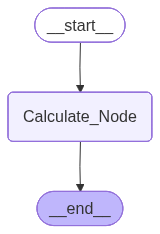

In [44]:
app

In [48]:
result = app.invoke({"name": "Mamad", "operator": "+", "numbers": [5, 10]})
print(result["message"])

Hello Mamad, welcome to LangGraph!, and the result is 15


In [49]:
result = app.invoke({"name": "Mamad", "operator": "*", "numbers": [5, 10]})
print(result["message"])

Hello Mamad, welcome to LangGraph!, and the result is 50
